In [1]:
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
from loss import den_loss, den_loss_abs
import keras.losses
keras.losses.den_loss_sqr = den_loss
from img_preprocessing import get_full_frame

/home/aidan/anaconda3/envs/py3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
#model_dir = "./small_column/checkpoints/small_column_weights.h5"
model_dir = "./large_column/checkpoints/large_column_weights.h5"
m = load_model(model_dir, custom_objects={"den_loss_abs": den_loss_abs})

In [7]:
blur = True
sample_frame = 0
frame = get_full_frame(sample_frame, blur=blur, scale_down=1)
img = frame["image"]
num_heads = len(frame["locations"])
ground_truth = frame["loc_img"].reshape((480, 640))

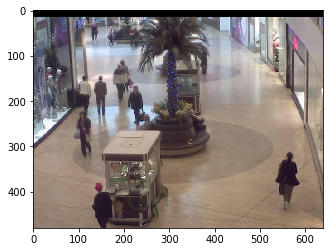

In [8]:
img_in = img.reshape((1, 480, 640, 3))
out = m.predict(img_in)
img_out = out.reshape((120, 160))
plt.imshow(img_in[0])

17.0
19.568783


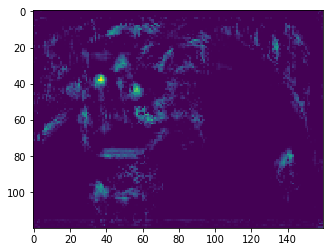

In [9]:
print(np.sum(ground_truth))
print(np.sum(img_out))
#plt.imshow(ground_truth)
plt.imshow(img_out)